# Kaggle Titanic 생존자 예측

## 주어진 데이터를 이용해 어떤 사람의 생존율이 높은지 확인하고 상위권 점수에 도전하겠습니다.

### 라이브러리 세팅

In [1]:
import pandas as pd  #pandas는 분석용 라이브러리입니다.
import seaborn as sns  #seaborn은 시각화 라이브러리입니다.
import matplotlib.pyplot as plt  #matplotlib.pyplot은 시각화 보조 라이브러리입니다. 현재 파이썬 파일에서 시각화 자료를 보여주도록 matplotlib inline도 추가하겠습니다.
%matplotlib inline  

### 데이터 로드

#### -머신러닝 알고리즘에 학습시킬 데이터인 training data

In [2]:
train = pd.read_csv('train.csv')  #train이라는 변수에 csv파일을 읽는 코드인 pd.read_csv를 이용해 train.csv 파일을 불러옵니다.
print(train.shape)  #train.shape를 이용해 행과 열의 갯수를 파악합니다. train 데이터는 891개의 행과 12개의 열로 이루어져 있습니다.
train.head()  #head()의 기능을 이용해 train데이터에서 가장 위에 있는 5개의 데이터를 불러옵니다.

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### -머신러닝 알고리즘으로 예측할 데이터인 test data

In [3]:
test = pd.read_csv('test.csv')  #test라는 변수에 csv파일을 읽는 코드인 pd.read_csv를 이용해 test.csv 파일을 불러옵니다.
print(test.shape)  #test.shape를 이용해 행과 열의 갯수를 파악합니다. test 데이터는 418개의 행과 11개의 열로 이루어져 있습니다.
test.head()  #head()의 기능을 이용해 test데이터에서 가장 위에 있는 5개의 데이터를 불러옵니다.

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### 컬럼(열) 설명

PassengerId = 승객번호 \
Survivied = 생존 여부(1이면 생존, 0이면 사망) \
Pclass = 티켓 등급(1은 1등급(First), 2는 2등급(Business), 3은 3등급(Economy)) \
Name = 승객 이름 \
Sex = 성별 \
Age = 나이 \
SisSp = 동승한 형제/자매 및 배우자 수 \
Parch = 동승한 부모 및 자녀 수 \
Ticket = 티켓 번호 \
Fare = 운임 요금 \
Cabin = 객실 번호 \
Embarked = 선착장(C는 셰르부르(Cherbourg)라는 프랑스 지역, Q는 퀸스타운(Queenstown)이라는 영국 지역, S는 사우스햄튼(Southampton)이라는 영국 지역)

### 탐험적 데이터 분석

#### Sex 성별 생존자 분석

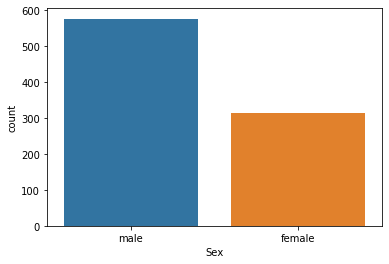

In [4]:
sns.countplot(data = train, x = 'Sex') #seaborn의 countplot을 이용해 성별 탑승자 수를 확인해 보겠습니다.
                                       #남성은 약 580명 여성은 약 300명이 탑승한 것을 알 수 있습니다.

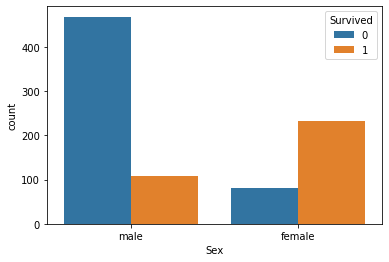

In [5]:
sns.countplot(data = train, x = 'Sex', hue = 'Survived') #seaborn의 countplot을 이용해 성별 생존자 수를 확인해 보겠습니다.
                                                         #남성은 약 100명이 생존, 여성은 약 200명이 생존한 것을 알 수 있습니다.

In [6]:
pd.pivot_table(train, index = 'Sex', values = 'Survived') #피봇테이블을 이용해 성별 생존율을 확인해 보겠습니다.
                                                          #여성은 약 74%, 남성은 약 19%의 생존율인 것을 알 수 있습니다.

,Survived
Sex,
female,0.742038
male,0.188908


분석결과 남성에 비해 여성의 생존율이 높은 것을 알 수 있습니다.

#### Pclass 객실 등급별 생존자 분석

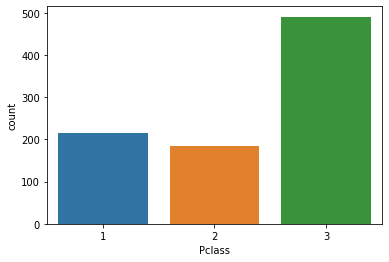

In [7]:
sns.countplot(data = train, x = 'Pclass')  #seaborn의 countplot을 이용해 Pclass별 탑승자 수를 확인해 보겠습니다.
                                           #3등급에 약 480명, 2등급에 약 180명, 1등급에 약 210명이 탑승한 것을 알 수 있습니다.

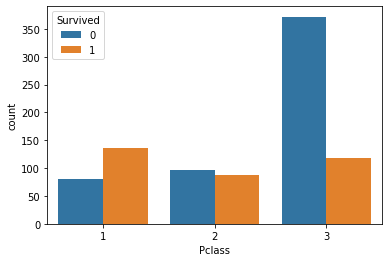

In [9]:
sns.countplot(data = train, x = 'Pclass', hue = 'Survived')  #seaborn의 countplot을 이용해 Pclass별 생존자 수를 확인해 보겠습니다.
                                                             #1등급에서는 약 130명, 2등급에서는 약 80명, 3등급에서는 약 110명이 생존한 것을 알 수 있습니다.

In [8]:
pd.pivot_table(train, index = 'Pclass', values = 'Survived')  #피봇테이블을 이용해 Pclass별 생존율을 확인해 보겠습니다.
                                                              #1등급은 약 62%, 2등급은 약 47%, 3등급은 약 24%의 생존율인 것을 알 수 있습니다.

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


분석 결과 객실 등급이 높을수록 생존율이 높아지는 것을 알 수 있습니다.

#### Embarked 선착장별 생존자 분석

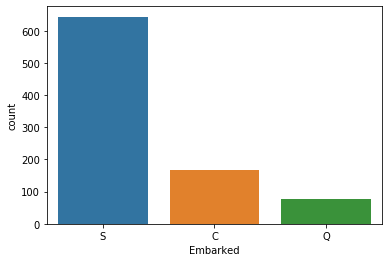

In [10]:
sns.countplot(data = train, x = 'Embarked')  #seaborn의 countplot을 이용해 Embarked별 탑승자 수를 확인해 보겠습니다.
                                             #S에서는 약 630명, C에서는 약 150명, Q에서는 약 80명이 탑승한 것을 알 수 있습니다.

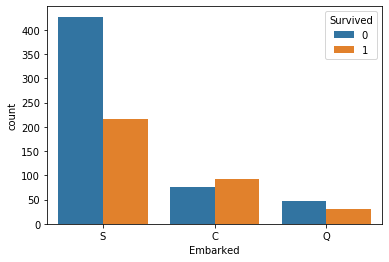

In [11]:
sns.countplot(data = train, x = 'Embarked', hue = 'Survived')  #seaborn의 countplot을 이용해 Embarked별 생존자 수를 확인해 보겠습니다.
                                                               #S에서는 약 200명, C에서는 약 70명, Q에서는 약 30명이 생존한 것을 알 수 있습니다.

In [12]:
pd.pivot_table(train, index = 'Embarked', values = 'Survived')  #피봇테이블을 이용해 Embarked별 생존율을 확인해 보겠습니다.
                                                                #C에서는 약 55%, Q에서는 약 39%, S에서는 약 34%의 생존율을 확인할 수 있습니다.

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


분석 결과 C, Q, S 순으로 생존율이 높은 것을 알 수 있습니다.

#### SibSp와 Parch를 이용한 생존자 분석

SibSp가 동승한 형제/자매 및 배우자 수를 의미하고 Parch가 동승한 부모 및 자녀 수를 의미하기 때문에 여기에 해당 승객을 합치면 총 가족수가 된다는 사실을 알 수 있습니다. 따라서 총 가족 수를 의미하는 변수를 만들어 분석해 보도록 하겠습니다.

In [13]:
train['Family_size'] = train['SibSp'] + train['Parch'] + 1 

In [14]:
test['Family_size'] = test['SibSp'] + test['Parch'] + 1

In [15]:
train[['SibSp', 'Parch', 'Family_size']].head() #이렇게 변수가 제대로 생성된 것을 확인할 수 있습니다.

,SibSp,Parch,Family_size
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1


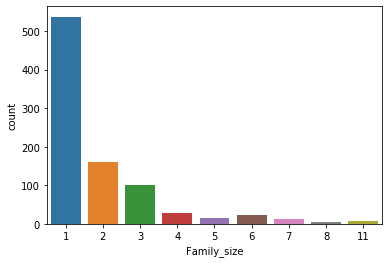

In [16]:
sns.countplot(data = train, x = 'Family_size')  #seaborn의 countplot을 이용해 Family_size별 탑승자 수를 확인해 보겠습니다.
                                                #혼자 탄 승객이 가장 많고 4명이하의 가족 형태와 5명이상의 가족 형태도 있는 것을 알 수 있습니다.

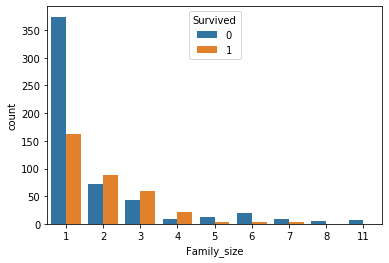

In [17]:
sns.countplot(data = train, x = 'Family_size', hue = 'Survived')  #seaborn의 countplot을 이용해 Family_size별 생존자 수를 확인해 보겠습니다.
                                                                  #생존율을 보면 2~4인 가족 형태의 생존율이 가장 높은 것을 알 수 있습니다.

조금 더 보기 좋게 독신, 핵가족, 대가족의 형태로 나누어 보겠습니다.

In [18]:
def family_type(i):        #가족 형태를 나누기 편하게 함수를 정의해 적용해 보겠습니다.
    if i == 1:             #Family_size가 1이면 Single로 출력하라는 코드입니다.
        return 'Single'
    elif i > 1 and i < 5:  #Family_size가 2~4이면 Nuclear로 출력하라는 코드입니다.
        return 'Nuclear'
    else:                  #그 이외는 Big으로 출력하라는 코드입니다.
        return 'Big'

In [19]:
train['Family_type'] = train['Family_size'].apply(family_type)  #위에서 정의한 함수를 적용해 가족 형태 변수를 만듭니다.

In [20]:
test['Family_type'] = test['Family_size'].apply(family_type)   #test 데이터에도 똑같이 적용을 해줍니다.

In [21]:
train[['Family_size', 'Family_type']].head() #함수 적용이 제대로 된 것을 확인할 수 있습니다.

,Family_size,Family_type
0,2,Nuclear
1,2,Nuclear
2,1,Single
3,2,Nuclear
4,1,Single


그 다음 가족 형태별 생존율을 확인해 보겠습니다.

In [22]:
pd.pivot_table(train, index = 'Family_type', values = 'Survived')  #독신은 약 30%, 핵가족은 약 58%, 대가족은 약 16%의 생존율인 것을 알 수 있습니다.

,Survived
Family_type,
Big,0.161290
Nuclear,0.578767
Single,0.303538


분석 결과 총 가족 수가 2~4명인 핵가족의 생존율이 가장 높은 것을 알 수 있습니다.

#### Name 이름을 이용한 생존자 분석

단순히 이름만 가지고 생존자 분석을 하는 데에는 문제가 있지만, 이름을 자세히 살펴보면 소스가 될만한 것이 있습니다. 이름을 살펴보겠습니다.

In [23]:
train['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

이름 중간에는 성별과 혼인 여부를 알 수 있는 호칭이 있어 소스로 사용할 수 있을 것 같습니다. 그럼 호칭만 따로 추출한 변수를 만들어 보겠습니다.

In [24]:
def title(i):                               #이름에서 호칭만 추출할 함수를 정의해 주겠습니다.
    return i.split(', ')[1].split('.')[0]  #split을 이용해 Name에서 ,와 .을 기준으로 나눠주겠습니다.

In [25]:
train['Title'] = train['Name'].apply(title) #위에서 정의한 함수를 적용해 줍니다.

In [26]:
test['Title'] = test['Name'].apply(title)  #test 데이터에도 같이 적용해 줍니다.

In [27]:
train[['Name', 'Title']].head()  #함수가 제대로 적용된 것을 확인할 수 있습니다.

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


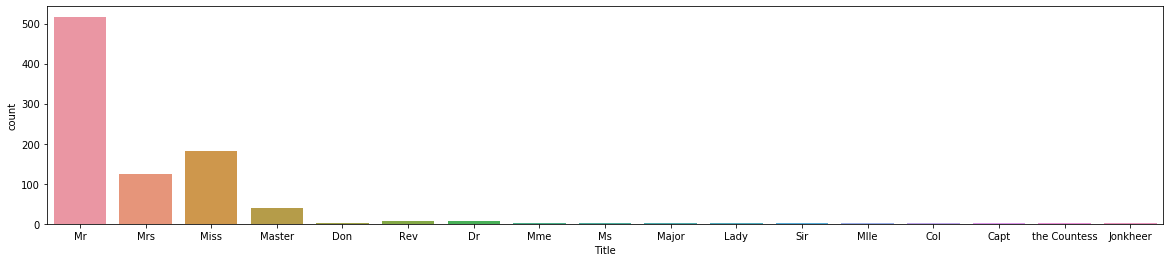

In [28]:
plt.figure(figsize = (20, 4))  #matplotlib.pyplot을 이용해 시각화 그래프의 크기를 조절해 주겠습니다.
sns.countplot(data = train, x = 'Title') #seaborn의 countplot을 이용해 Title별 탑승자 수를 확인해 보겠습니다.
                                         #기혼 남성인 Mr가 약 510명, 미혼 남성인 Master가 약 40명
                                         #기혼 여성인 Mrs가 약 120명, 미혼 여성인 Miss가 약 170명이 탑승한 것을 알 수 있습니다.

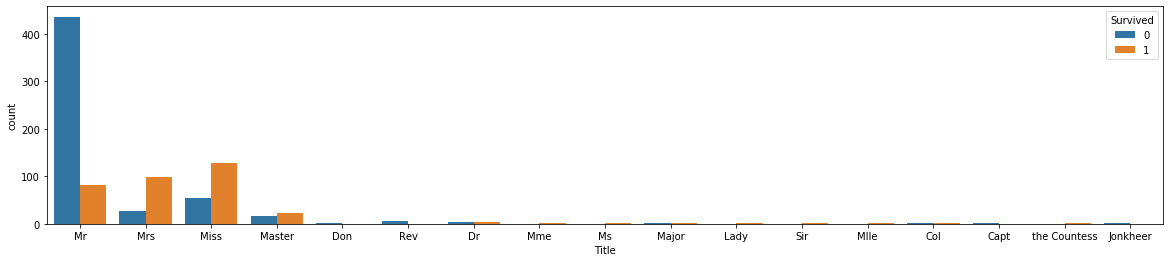

In [29]:
plt.figure(figsize = (20, 4))  #matplotlib.pyplot을 이용해 시각화 그래프의 크기를 조절해 주겠습니다.
sns.countplot(data = train, x = 'Title', hue = 'Survived')  #seaborn의 countplot을 이용해 Title별 생존자 수를 확인해 보겠습니다.
                                                            #여성의 생존자 수가 많고 남성의 생존자 수가 적은 것을 알 수 있습니다.

Mr, Mrs, Miss, Master를 제외한 호칭은 데이터 수가 너무 적기 때문에 분석시 혼란을 야기할 수 있으므로 4가지 호칭으로만 확인해 보겠습니다.

In [30]:
Title_Survived = pd.pivot_table(train, index = 'Title', values = 'Survived')  #피봇테이블을 이용해 Title별 생존율을 확인해 보겠습니다.
Title_Survived.loc[['Mr', 'Mrs', 'Miss', 'Master']]                           #Mr는 약 16%, Mrs는 약 79%, Miss는 약 70%, Master는 약 58%의 생존율인 것을 알 수 있습니다.

,Survived
Title,
Mr,0.156673
Mrs,0.792000
Miss,0.697802
Master,0.575000


분석 결과 역시 남성보다 여성의 생존율이 높은 것을 알 수 있었습니다. 그러나 미혼 남성인 Master의 생존율이 생각보다 높은 점을 미루어 보았을 때 분석시 충분히 가치가 있을 것으로 생각됩니다.

#### Age와 Fare 동시에  활용해 생존자 분석

이번에는 Age와 Fare를 동시에 시각화해 생존자 비교를 해보겠습니다.

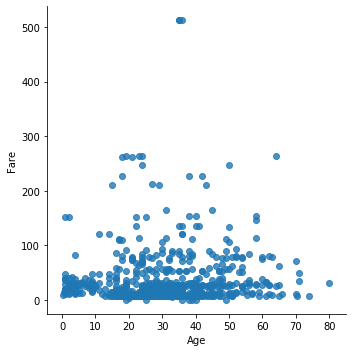

In [31]:
sns.lmplot(data = train, x = 'Age', y = 'Fare', fit_reg = False) #seaborn의 lmplot을 이용해 탑승자 분포정도를 확인하겠습니다.
                                                                  #탑승자 중 10세 이하, 20~40대의 비율이 많은 것을 알 수 있습니다.
                                                                  #요금은 100 미만이 많이 분포하고 있음을 알 수 있습니다.
                                                                  #요금이 500 이상인 경우는 극히 드물기 때문에 이상치라고 판단하겠습니다.

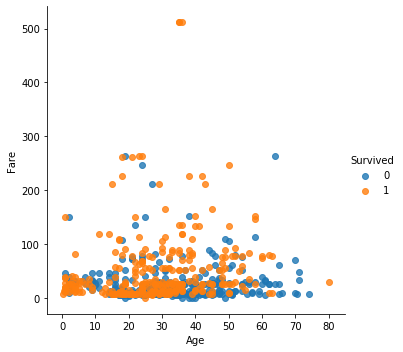

In [32]:
sns.lmplot(data = train, x = 'Age', y = 'Fare', hue = 'Survived',fit_reg = False) #seaborn의 lmplot을 이용해 생존자 분포정도를 확인하겠습니다.

그래프를 통해 확인할 수 있는 것은 운임 요금이 100 이상이면 생존율이 더 높다는 것입니다. 좀 더 세밀하게 확인하기 위해 범위를 좁혀 이상치를 제거한 그래프를 확인해 보겠습니다.

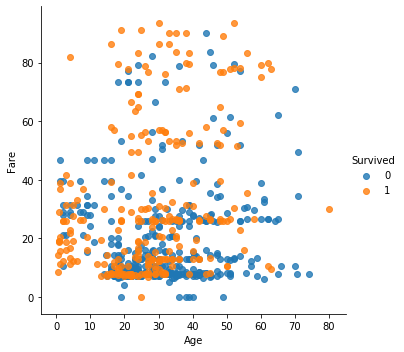

In [33]:
low_fare = train[train['Fare'] < 100]  #운임 요금이 100 미만인 데이터를 만들어 그래프를 만들어 보겠습니다.
sns.lmplot(data = low_fare, x = 'Age', y = 'Fare', hue = 'Survived',fit_reg = False)

현재 그래프에서는 나이가 어리거나 운임 요금이 비쌀수록 생존율이 높은 것을 확인할 수 있습니다.

#### PassengerId, Ticket, Cabin의 활용성

In [34]:
pd.options.display.max_rows = 1000  #최대로 보여주는 행 수를 1000으로 설정하는 코드입니다.

In [35]:
train['PassengerId'] #PassengerId를 보면 단순히 숫자가 차례로 증가는 것을 알 수 있습니다. 따라서 분석시 크게 도움이 되지 않을 것입니다.

0        1
1        2
2        3
3        4
4        5
5        6
6        7
7        8
8        9
9       10
10      11
11      12
12      13
13      14
14      15
15      16
16      17
17      18
18      19
19      20
20      21
21      22
22      23
23      24
24      25
25      26
26      27
27      28
28      29
29      30
30      31
31      32
32      33
33      34
34      35
35      36
36      37
37      38
38      39
39      40
40      41
41      42
42      43
43      44
44      45
45      46
46      47
47      48
48      49
49      50
50      51
51      52
52      53
53      54
54      55
55      56
56      57
57      58
58      59
59      60
60      61
61      62
62      63
63      64
64      65
65      66
66      67
67      68
68      69
69      70
70      71
71      72
72      73
73      74
74      75
75      76
76      77
77      78
78      79
79      80
80      81
81      82
82      83
83      84
84      85
85      86
86      87
87      88
88      89
89      90
90      91

Ticket과 Cabin은 Pclass로 충분히 설명이 될 것 같으므로 굳이 사용하지 않아도 될 것 같습니다.

여기까지 분석한 결과 여성 및 미혼 남성, 등급이 높은 객실, C 선착장, 나이가 젊거나 운임 요금이 비쌀수록 생존율이 높다는 결론을 낼 수 있을 것 같습니다.

### 데이터 전처리

이제 머신러닝 알고리즘에 적용할 수 있도록 데이터 전처리 과정에 들어가도록 하겠습니다.
머신러닝 알고리즘에 데이터를 적용하기 위해서는 결측값이 없어야 하고 실수형 혹은 정수형 데이터 형태여야 하기 때문에 결측값을 채워주고 문자형 데이터를 숫자형으로 변환하도록 하겠습니다. 그리고 예측이 도움이 될만한 컬럼을 정리하도록 하겠습니다.

#### 문자형 데이터 탐색

In [36]:
train.select_dtypes(include = 'object').head()  #select_dtypes을 이용해 object형(문자형) 데이터만 보도록 하겠습니다.
                                                #Name, Sex, Ticket, Cabin, Embarked, Family_type, Title이 object형인 것을 알 수 있습니다.

,Name,Sex,Ticket,Cabin,Embarked,Family_type,Title
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S,Nuclear,Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C,Nuclear,Mrs
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S,Single,Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S,Nuclear,Mrs
4,"Allen, Mr. William Henry",male,373450,NaN,S,Single,Mr


하지만 Name에서 유의미한 데이터인 Title(호칭)을 만들었기 때문에 Name은 더 이상 필요가 없을 것 같습니다.
마찬가지로 Ticket과 Cabin도 Pclass를 통해 설명이 될 것 같기 때문에 머신러닝 적용에서 빼도 될 것 같습니다.
결과적으로 Sex, Embarked, Family_type, Title만 변환을 해주도록 하겠습니다.

##### Sex 성별 컬럼 변환

In [37]:
train['Sex'].unique()  #성별은 남성, 여성으로만 나누어져 있기 때문에 남성을 0, 여성을 1로 변환하겠습니다.

array(['male', 'female'], dtype=object)

In [38]:
train['Sex'] = train['Sex'].replace('male', 0).replace('female', 1)  #replace를 이용해 간단하게 변경을 해주었습니다.
train['Sex'].head()  #변환된 값을 보면 0, 1로 잘 변환된 것을 알 수 있습니다.

0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64

In [39]:
test['Sex'] = test['Sex'].replace('male', 0).replace('female', 1)  #test에도 적용해주겠습니다.
test['Sex'].head()

0    0
1    1
2    0
3    0
4    1
Name: Sex, dtype: int64

##### Embarked 선착장 컬럼 변환

-Embarked도 변환을 할 것이지만, C, S, Q 값을 가령 0, 1, 2로 설정하면 머신러닝 적용시 연산을 할 가능성이 있어 성별과 마찬가지로 0(False), 1(True)의 방식으로만 변환하는 One-hot 인코딩을 하도록 하겠습니다.

In [40]:
train['Embarked_C'] = (train['Embarked'] == 'C')  #Embarked가 C이면 참인 값을 출력하고 아니면 거짓인 값을 출력하도록 합니다.
train['Embarked_S'] = (train['Embarked'] == 'S')  #Embarked가 S이면 참인 값을 출력하고 아니면 거짓인 값을 출력하도록 합니다.
train['Embarked_Q'] = (train['Embarked'] == 'Q')  #Embarked가 Q이면 참인 값을 출력하고 아니면 거짓인 값을 출력하도록 합니다.

In [41]:
train[['Embarked', 'Embarked_C', 'Embarked_S', 'Embarked_Q']].head()  #변환된 값을 확인해 보면 잘 적용이 된 것을 알 수 있습니다.

,Embarked,Embarked_C,Embarked_S,Embarked_Q
0,S,False,True,False
1,C,True,False,False
2,S,False,True,False
3,S,False,True,False
4,S,False,True,False


In [42]:
test['Embarked_C'] = (test['Embarked'] == 'C')  #test 데이터에도 똑같이 적용하도록 하겠습니다.
test['Embarked_S'] = (test['Embarked'] == 'S')
test['Embarked_Q'] = (test['Embarked'] == 'Q')

In [43]:
test[['Embarked', 'Embarked_C', 'Embarked_S', 'Embarked_Q']].head()  #변환된 값을 확인해 보면 잘 적용이 된 것을 알 수 있습니다.

,Embarked,Embarked_C,Embarked_S,Embarked_Q
0,Q,False,False,True
1,S,False,True,False
2,Q,False,False,True
3,S,False,True,False
4,S,False,True,False


##### Family_type 컬럼 변환

-Embarked 컬럼과 마찬가지로 Family_type의 Single, Nuclear, Big 값도 One-hot 인코딩을 해주겠습니다. 이번에는 lambda함수를 이용해 보겠습니다.

In [44]:
train['Single'] = train['Family_type'].apply(lambda x : True if x == 'Single' else False)  #lambda를 이용해 Family_type이 Single이면 참 아니면 거짓을 출력하도록 하겠습니다.
train['Nuclear'] = train['Family_type'].apply(lambda x : True if x == 'Nuclear' else False)  #lambda를 이용해 Family_type이 Nuclear이면 참 아니면 거짓을 출력하도록 하겠습니다.
train['Big'] = train['Family_type'].apply(lambda x : True if x == 'Big' else False)  #lambda를 이용해 Family_type이 Big이면 참 아니면 거짓을 출력하도록 하겠습니다.

In [45]:
train[['Family_type', 'Single', 'Nuclear', 'Big']].head()  #변환된 값을 확인해 보면 잘 적용이 된 것을 알 수 있습니다.

,Family_type,Single,Nuclear,Big
0,Nuclear,False,True,False
1,Nuclear,False,True,False
2,Single,True,False,False
3,Nuclear,False,True,False
4,Single,True,False,False


In [47]:
test['Single'] = test['Family_type'].apply(lambda x : True if x == 'Single' else False)  #test 데이터에도 똑같이 적용하도록 하겠습니다.
test['Nuclear'] = test['Family_type'].apply(lambda x : True if x == 'Nuclear' else False)
test['Big'] = test['Family_type'].apply(lambda x : True if x == 'Big' else False)

In [48]:
test[['Family_type', 'Single', 'Nuclear', 'Big']].head()  #변환된 값을 확인해 보면 잘 적용이 된 것을 알 수 있습니다.

,Family_type,Single,Nuclear,Big
0,Single,True,False,False
1,Nuclear,False,True,False
2,Single,True,False,False
3,Single,True,False,False
4,Nuclear,False,True,False


##### Title 컬럼 변환

In [49]:
train['Title'].unique()  #unique를 이용해 해당 컬럼이 어떤 값들을 가지고 있는지 파악하도록 하겠습니다.

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

-Title 컬럼을 보면 생각보다 많은 값을 가지고 있는 것을 알 수 있습니다. 이를 다 One-hot 인코딩을 하게 되면 정확도가 오히려 낮아질 가능성도 있기 때문에 이 중 남성임에도 불구하고 생존율이 높았던 Master를 중심으로 One-hot 인코딩을 하도록 하겠습니다.

In [50]:
train['Master'] = (train['Title'] == 'Master')  #Title이 Master이면 참이고 아니면 거짓을 출력하도록 하겠습니다.

In [51]:
train.loc[train['Title'] == 'Master', ['Title','Master']].head()  #변환된 값을 확인해 보면 잘 적용이 된 것을 알 수 있습니다.

,Title,Master
7,Master,True
16,Master,True
50,Master,True
59,Master,True
63,Master,True


In [52]:
test['Master'] = (test['Title'] == 'Master')  #test 데이터에도 똑같이 적용하도록 하겠습니다.

In [53]:
test.loc[test['Title'] == 'Master', ['Title','Master']].head()  #변환된 값을 확인해 보면 잘 적용이 된 것을 알 수 있습니다.

,Title,Master
21,Master,True
55,Master,True
64,Master,True
80,Master,True
89,Master,True


##### Age 컬럼의 활용

-앞선 탐험적 데이터 분석에서 나이가 어릴수록 생존자가 더 많았던 것을 알 수 있었습니다. 따라서 특정 나이를 기준으로 나누면 예측의 정확도가 높아지지 않을까 생각해 어린 층과 그 외의 층을 구분해 One-hot 인코딩을 적용해 보도록 하겠습니다.

In [54]:
train['Young'] = (train['Age'] < 16)  #16세 미만을 어린 층으로 잡아 Young이라는 변수에 넣어주도록 하겠습니다.

In [55]:
pd.pivot_table(train, index = 'Young', values = 'Survived')  #피봇테이블에서 보면 어린 층이 59%의 생존율인 것을 알 수 있습니다.

,Survived
Young,
False,0.362624
True,0.590361


In [56]:
test['Young'] = (test['Age'] < 16)  #test 데이터에도 똑같이 적용하도록 하겠습니다.

##### 결측값 확인과 처리

In [57]:
train.isnull().sum()  #isnull로 결측값 여부를 확인하고 sum까지 활용해 각 컬럼 당 총 결측값 수를 확인하도록 하겠습니다.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Family_size      0
Family_type      0
Title            0
Embarked_C       0
Embarked_S       0
Embarked_Q       0
Single           0
Nuclear          0
Big              0
Master           0
Young            0
dtype: int64

train 데이터에서는 Age, Cabin, Embarked에서 결측값이 확인되었으나 머신러닝에 적용할 컬럼은 아니라는 판단에 넘어가도록 하겠습니다.

In [58]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Family_size      0
Family_type      0
Title            0
Embarked_C       0
Embarked_S       0
Embarked_Q       0
Single           0
Nuclear          0
Big              0
Master           0
Young            0
dtype: int64

test 데이터에서는 Age, Cabin, Fare에서 결측값이 확인되었습니다. Age와 Cabin은 넘어가도 될 것같으나 Fare의 값은 머신러닝에 적용할 예정이므로 결측값을 처리하도록 하겠습니다.

In [59]:
test['Fare'] = test['Fare'].fillna(0)  #fillna를 이용해 결츨값을 평균, 중앙값 등 다양한 방법으로 처리할 수 있으나 한 개의 결측값이므로 0으로 처리하도록 하겠습니다.

### 훈련용 데이터 및 테스트용 데이터 설정

In [60]:
train.corr().sort_values(by = 'Survived', ascending = False)['Survived']  #train 데이터에서 타겟 변수인 Survived와 상관관계가 높은 컬럼 및 새롭게 만든 컬럼을 뽑아 feature로 묶도록 하겠습니다.

Survived       1.000000
Sex            0.543351
Nuclear        0.279855
Fare           0.257307
Embarked_C     0.168240
Young          0.136107
Master         0.085221
Parch          0.081629
Family_size    0.016639
Embarked_Q     0.003650
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Big           -0.125147
Embarked_S    -0.155660
Single        -0.203367
Pclass        -0.338481
Name: Survived, dtype: float64

상관관계가 10% 이상인 컬럼과 새롭게 만든 컬럼인 [Sex, Pclass, Single, Nuclear, Big, Fare, Embarked_C, Embarked_S, Embarked_Q, Young, Master]를 적용하도록 하겠습니다.

In [61]:
features = ['Sex', 'Pclass', 'Single', 'Nuclear', 'Big', 'Fare', 'Embarked_C', 'Embarked_S', 'Embarked_Q', 'Young', 'Master']
features

['Sex',
 'Pclass',
 'Single',
 'Nuclear',
 'Big',
 'Fare',
 'Embarked_C',
 'Embarked_S',
 'Embarked_Q',
 'Young',
 'Master']

In [62]:
x_train = train[features]  #features를 이용해 머신러닝에 적용할 데이터 프레임을 따로 x_train으로 지정하도록 하겠습니다.
print(x_train.shape)  #x_train이 891개의 행과 11개의 열로 이루어져 있는 것을 알 수 있습니다.
x_train.head()  #head 기능을 이용해 잘 적용이 되었는지 상위 5개의 값을 출력해 보겠습니다.

(891, 11)


,Sex,Pclass,Single,Nuclear,Big,Fare,Embarked_C,Embarked_S,Embarked_Q,Young,Master
0,0,3,False,True,False,7.2500,False,True,False,False,False
1,1,1,False,True,False,71.2833,True,False,False,False,False
2,1,3,True,False,False,7.9250,False,True,False,False,False
3,1,1,False,True,False,53.1000,False,True,False,False,False
4,0,3,True,False,False,8.0500,False,True,False,False,False


In [63]:
x_test = test[features]  #test 데이터에도 적용해 주도록 하겠습니다.
print(x_test.shape)
x_test.head()

(418, 11)


,Sex,Pclass,Single,Nuclear,Big,Fare,Embarked_C,Embarked_S,Embarked_Q,Young,Master
0,0,3,True,False,False,7.8292,False,False,True,False,False
1,1,3,False,True,False,7.0000,False,True,False,False,False
2,0,2,True,False,False,9.6875,False,False,True,False,False
3,0,3,True,False,False,8.6625,False,True,False,False,False
4,1,3,False,True,False,12.2875,False,True,False,False,False


### 타겟 변수 설정

In [64]:
y_train = train['Survived']  #타겟 변수인 Survived를 train 데이터에서 가져와 y_train으로 지정하도록 하겠습니다.
print(y_train.shape)
y_train.head()

(891,)


0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

### 머신러닝 알고리즘 모델 적용

머신러닝 알고리즘 모델에는 다양한 종류가 존재하나 이번에는 scikit-learn의 DecisionTree를 이용해 보도록 하겠습니다. 이번 주제의 목표가 생존자 혹은 사망자 예측 즉, 분류 문제이기 때문에 분류형 모델을 사용하도록 하겠습니다.

In [65]:
from sklearn.tree import DecisionTreeClassifier  #scikit-learn에서 분류형 DecisionTree인 DecisionTreeClassifier 모델을 가져오도록 하겠습니다.
model = DecisionTreeClassifier()  #불러온 모델을 model이라는 변수에 담아주도록 하겠습니다.
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

#### Hyperparmeter 설정

머신러닝 모델의 옵션에 해당하는 hyperparameter의 최적값을 Coarse Search로 찾아 보도록 하겠습니다.

In [66]:
import numpy as np #고성능 수칙계산에 용이하게 numpy를 np로 줄여 불러오도록 하겠습니다.
from sklearn.model_selection import cross_val_score  #scikit-learn에서 교차검증 스코어 모델을 불러오도록 하겠습니다.
num_epoch = 100  #무작위로 100번을 실행하도록 하겠습니다.
coarse_hyperparameters_list = []  #hyperparameter 값의 결과를 리스트로 묶도록 하겠습니다.
for epoch in range(num_epoch):  #100번을 반복할 반복문을 작성하도록 하겠습니다.
    max_depth = np.random.randint(low = 2, high = 100)  #DecisionTree의 최대 뿌리를 2~100의 값을 무작위로 설정하도록 하겠습니다.
    max_features = np.random.uniform(low = 0.1, high = 1.0)  #전체 feature 중 몇 퍼센트를 사용할지 10~100%의 값을 무작위로 설정하도록 하겠습니다.
    
    model = DecisionTreeClassifier(max_depth = max_depth, max_features = max_features, random_state = 7)  #결과가 아무렇게나 나오지 않도록 고정하기 위해 random_state를 사용하도록 하겠습니다.
    
    score = cross_val_score(model, x_train, y_train, cv = 20, scoring = 'accuracy').mean()  #스코어 예측은 정확도로 하고 교차검증 20번의 평균 값을 출력하도록 하겠습니다.
    
    hyperparameters = { 'epoch': epoch,  #설정될 값을 각각 딕셔너리로 묶어주도록 하겠습니다.
        'score': score,
        'max_depth': max_depth,
        'max_features': max_features,
                      }
    
    coarse_hyperparameters_list.append(hyperparameters)  #무작위로 출력한 hyperparameter의 값을 리스트에 추가하도록 하겠습니다.
    
    print(f"{epoch:2} max_depth = {max_depth:2}, max_features = {max_features}, Score = {score}")  #무작위로 추출된 hyperparameter의 값과 예측된 스코어를 출력하도록 하겠습니다.   

coarse_hyperparameters_list = pd.DataFrame.from_dict(coarse_hyperparameters_list)  #리스트의 값들을 데이터 프레임화해 보기 좋게 만들도록 하겠습니다.
          
coarse_hyperparameters_list = coarse_hyperparameters_list.sort_values(by = 'score', ascending = False)  #예측된 스코어를 높은 순으로 정렬하도록 하겠습니다.

print(coarse_hyperparameters_list.shape)

coarse_hyperparameters_list.head(10)  #출력된 데이터의 상위 10개 값을 보도록 하겠습니다.

 0 max_depth = 42, max_features = 0.6584831106259458, Score = 0.8149560825647783
 1 max_depth =  9, max_features = 0.9737148570353374, Score = 0.8374549846288977
 2 max_depth = 37, max_features = 0.7349574827433843, Score = 0.8172507685551164
 3 max_depth = 47, max_features = 0.9474009255031389, Score = 0.8285638998682477
 4 max_depth = 22, max_features = 0.5637595803277236, Score = 0.8139909969257795
 5 max_depth = 20, max_features = 0.6956567616878557, Score = 0.8149560825647783
 6 max_depth = 39, max_features = 0.317889425907097, Score = 0.8060628019323671
 7 max_depth = 17, max_features = 0.4720760275592071, Score = 0.826191260430391
 8 max_depth = 60, max_features = 0.665619448234434, Score = 0.8149560825647783
 9 max_depth = 66, max_features = 0.8173260930490741, Score = 0.8172507685551164
10 max_depth = 66, max_features = 0.7286538472443428, Score = 0.8172507685551164
11 max_depth = 98, max_features = 0.9369989119276727, Score = 0.8285638998682477
12 max_depth = 59, max_features

,epoch,score,max_depth,max_features
1,1,0.837455,9,0.973715
48,48,0.834020,10,0.964533
50,50,0.830761,31,0.820903
18,18,0.830761,33,0.853397
61,61,0.830761,87,0.834458
91,91,0.830761,72,0.893634
13,13,0.830761,38,0.862551
24,24,0.828564,32,0.930393
35,35,0.828564,59,0.989730
17,17,0.828564,80,0.976894


출력 결과 1번째 결과가 0.837455의 스코어로 가장 좋은 결과를 냈습니다. 따라서 해당 스코어의 parameter인 max_depth 9과 max_features 0.973715의 값을 DecisionTree에 적용하도록 하겠습니다.

In [67]:
model = DecisionTreeClassifier(max_depth = 9, max_features= 0.973715, random_state = 7)
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
                       max_features=0.973715, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=7, splitter='best')

#### 머신러닝 학습

In [68]:
model.fit(x_train, y_train)  #정리한 훈련용 데이터를 DecisionTree에 적용하도록 하겠습니다.

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
                       max_features=0.973715, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=7, splitter='best')

#### 결과 예측

In [69]:
predictions = model.predict(x_test)  #학습된 머신러닝으로 test 데이터의 생존자와 사망자를 예측하도록 하겠습니다.
print(predictions.shape)
predictions[:5]  #예측값의 상위 5개 값을 보도록 하겠습니다.

(418,)


array([0, 1, 0, 0, 1], dtype=int64)

### 결과물 제출

In [70]:
submit = pd.read_csv('gender_submission.csv')  #캐글 제출 파일 형식인 submission csv파일을 submit이라는 변수에 넣어주도록 하겠습니다.
submit['Survived'] = predictions  #제출 파일의 타겟 변수에 예측값을 대입하도록 하겠습니다.
submit.to_csv('최종 결과물.csv', index = False)  #to_csv 기능을 이용해 제출 파일을 따로 만들도록 하겠습니다. 